## ngrams and topic formation

In [2]:
#!pip install -r script/requirements.txt --user

### Setup

In [1]:
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.plotting import figure, output_file, show
from collections import Counter
from functools import reduce
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from IPython.core.interactiveshell import InteractiveShell
from nltk.corpus import stopwords
from plotly.offline import iplot
from pprint import pprint
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from textblob import TextBlob
import collections
import csv
import cufflinks
import emoji
import en_core_web_sm
import gensim
import gensim.corpora as corpora
import itertools
import matplotlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import pyLDAvis
import re
import scattertext as st
import seaborn as sns
import spacy
import spacy
import warnings 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

C:\Users\Swazy\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Swazy\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
InteractiveShell.ast_node_interactivity = 'all'
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

output_notebook()
pd.options.display.max_columns = 30
warnings.filterwarnings('ignore')

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

nlp = spacy.load('en_core_web_sm')

C:\Users\Swazy\anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



Loading BokehJS ...

C:\Users\Swazy\anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



In [3]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Swazy\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
words = set(nltk.corpus.words.words())

### Load File

In [5]:
filename: str = "./../artifacts/ifa-ie-articles.csv"
#df = pd.read_csv("./../artifacts/ifa-ie-beef-articles-clean.csv")
df = pd.read_csv(filename)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              872 non-null    object 
 1   Heading          872 non-null    object 
 2   Date             872 non-null    object 
 3   Trend            872 non-null    object 
 4   Text             872 non-null    object 
 5   HTML Content     872 non-null    object 
 6   clean_text       872 non-null    object 
 7   polarity_tokens  872 non-null    float64
 8   review_len       872 non-null    int64  
 9   word_count       872 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 68.2+ KB


In [18]:
df['Text'][df['Trend'] == 'cattle'].iloc[0]

'\r\nPrices reported as quoted or paid to IFA Members.\r\nStrong Demand. Prices rising. Factories paying above quotes. Steer base €4.30/4.40/kg. Heifer base €4.35/4.45/kg. Higher deals for larger and specalised lots. Young Bulls R/U €4.25/4.40/kg. Cows €3.60/€4.10/kg. In-spec bonus 20c/kg for under 30 months and 8c/kg for 30 to 36 months. 12c/kg bonus for under 30 month steers and heifers grading O- and those with a fat class of 4+ that meet all other in spec criteria.\r\nFACTORY BASE QUOTES C/KG\r\n\r\n\xa0SteersHeifersCowsDawn Slane430435350-400Kepak Athleague430435350-400Moyvalley Meats425/430430/435360-390Euro Farm Foods430435350-400ABP Clones430435350-400Liffey Meats430435350-400Slaney Foods430435350-410Kepak Kilbeggan430435350-400Dawn Ballyhaunis\xa0\xa0430435350-410Foyle Meats\xa0*incl 10c 300 – 400kg\xa0\xa0440*\xa0445*\xa0350-395*Ashbourne Meats430435350-410Meadowmeats Rathdowney430435350-390Charleville Foods430435350-390Kepak Watergrasshill430435350-390ABP Bandon430435350-390

In [19]:
df['Text'][df['Trend'] == 'dairy'].iloc[0]

'\r\n\r\n\r\nClick on the link below to join the IFA Dairy Calf Webinar at 8pm this evening, Wednesday 26th January.\r\nJoin the Meeting\r\n\r\n\r\nAs the calving season gets underway, IFA will host a Dairy Calf webinar on Wednesday, Jan 26th at 8pm.\r\nIFA Dairy Chairman Stephen Arthur said top-quality management of calves, particularly in their first four to six weeks, is essential to support a dairy sector that is both profitable and sustainable.\r\n“The webinar will inform farmers on how to use the latest technologies to improve the quality and value of calves born from the dairy herd and will also examine the viability of dairy calf to beef systems,” he said.\r\nThe speakers will include Rob Doyle from the Dept of Agriculture; Stephen Butler from Teagasc; Sean Coughlan from ICBF and Nicky Byrne from Teagasc.\r\nAttendees will be updated on the latest developments arising from the EU Committee of Inquiry on the Protection of Animals during Transport (ANIT Committee) which, if imple

### Graph

In [20]:
df['polarity_tokens'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity_tokens',
    linecolor='black',
    yTitle='count',
    title='Token Polarity Distribution')

In [21]:
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [22]:
#df['clean_text']= df['clean_text'].values.astype('U')

In [23]:
#df3.to_csv('df3.csv', index = False)

In [7]:
Positive_sent = df[df['sentiment']=='positive']

,Common_words,count
0,,115394
1,e,91553
2,a,61128
3,r,58950
4,i,51555
5,t,48443
6,n,42173
7,o,40377
8,s,35732
9,c,33845


In [24]:
# function to prepare n-grams
def count_ngrams(lines, min_length=2, max_length=4):
    lengths = range(min_length, max_length+1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen = max_length)
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current)>= length:
                ngrams[length][current[:length]] +=1
    for line in lines:
        for word in nltk.word_tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams

In [25]:
def print_most_freq_ng(ngrams, num=10):
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

In [26]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----10 most frequent 2-grams ----
milk price: 509
price report: 348
ifa president: 332
brendan golden: 316
livestock chairman: 309
ifa national: 306
steer heifer: 296
young bull: 285
joe healy: 283
beef price: 269

----10 most frequent 3-grams ----
brendan golden say: 252
angus wood say: 203
joe healy say: 194
young bull cow: 185
cow spec bonus: 157
report dafm week: 156
bull cow spec: 155
insist payment day: 152
ifa national livestock: 150
livestock chairman brendan: 149

----10 most frequent 4-grams ----
bull cow spec bonus: 153
young bull cow spec: 152
insist payment day cattle: 148
livestock chairman brendan golden: 148
quote pay ifa member: 146
farmer insist payment day: 143
ifa national livestock chairman: 141
price report quote pay: 139
ifa president joe healy: 139
report quote pay ifa: 137



In [15]:
bigramtodf = pd.DataFrame({'2-grams': [], '2-grams freq': []})
trigramtodf = pd.DataFrame({'3-grams': [], '3-grams freq': []})
quadgramtodf = pd.DataFrame({'4-grams': [], '4-grams freq': []})

In [16]:
def print_most_freq_ng(ngrams, num=2222):
    global bigramtodf, trigramtodf, quadgramtodf
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
            if n == 2:
                bigramtodf = bigramtodf.append({'2-grams': gram, '2-grams freq': count}, ignore_index=True)
            elif n == 3:
                trigramtodf = trigramtodf.append({'3-grams': gram, '3-grams freq': count}, ignore_index=True)
            else:
                quadgramtodf = quadgramtodf.append({'4-grams': gram, '4-grams freq': count}, ignore_index=True)
        print('')

In [20]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----2222 most frequent 2-grams ----
milk price: 509
price report: 347
ifa president: 332
steer heifer: 329
brendan golden: 316
livestock chairman: 309
ifa national: 306
young bull: 284
joe healy: 283
beef price: 269
angus wood: 264
say ifa: 259
golden say: 252
bull cow: 239
steer base: 227
bonus month: 213
healy say: 211
cattle price: 206
ifa livestock: 203
wood say: 203
spec bonus: 188
beef farmer: 186
base heifer: 184
bord bia: 184
tim cullinan: 179
national livestock: 173
tom phelan: 168
base price: 165
minister creed: 164
live export: 161
food kepak: 160
report dafm: 158
cow spec: 158
dafm week: 156
irish price: 153
ifa member: 152
insist payment: 152
department agriculture: 152
pay ifa: 151
payment day: 151
chairman brendan: 150
price increase: 150
quote pay: 149
day cattle: 149
factory base: 148
base quote: 147
say farmer: 146
farmer insist: 143
phelan say: 143
high deal: 140
report quote: 140
national dairy: 139
president joe: 139
cullinan say: 135
chairman tom: 132
price update

lairage operator: 19
pay milk: 19
butter cheese: 19
ifa work: 18
farm ballyhaunis: 18
farmer continue: 18
irish farm: 18
bull price: 18
deal available: 18
country say: 18
member price: 18
provide farmer: 18
new cap: 18
farm family: 18
pay price: 18
number week: 18
favourable market: 18
quality assurance: 18
task force: 18
industry ireland: 18
price level: 18
take place: 18
base young: 18
price irish: 18
figure number: 18
select sell: 18
sell advice: 18
payment scheme: 18
state aid: 18
liquid milk: 18
retail sale: 18
cow herd: 18
phil hogan: 18
price table: 18
price vat: 18
spot price: 18
milk cheque: 18
milk powder: 18
west cork: 18
cork op: 18
main milk: 18
european milk: 18
market beef: 17
increase say: 17
say agriculture: 17
pay steer: 17
date year: 17
lamb import: 17
price remain: 17
say mart: 17
suckler herd: 17
cow cattle: 17
meeting ifa: 17
date slaughter: 17
factory increase: 17
say week: 17
meet requirement: 17
month say: 17
processing sector: 17
leo varadkar: 17
value market:

agriculture committee: 10
grass base: 10
commission need: 10
call factory: 10
dafm average: 10
pgi application: 10
date ifa: 10
cattle mart: 10
price competition: 10
high quality: 10
dumping duty: 10
mart country: 10
young bulls: 10
bulls excl: 10
slaughter compare: 10
compare decrease: 10
eligible animal: 10
committee member: 10
price july: 10
meat ashbourne: 10
fat score: 10
beef crisis: 10
campaign increase: 10
milk solid: 10
livestock mart: 10
loss make: 10
calf bear: 10
farm gate: 10
continue support: 10
compound feed: 10
green party: 10
beef fund: 10
price low: 10
price scheme: 10
op farmer: 10
infant formula: 10
fodder import: 10
processor pay: 10
say milk: 10
international dairy: 10
return milk: 10
ppi return: 10
dairy import: 10
price conclude: 10
average return: 10
market sentiment: 10
price review: 10
price stable: 10
table right: 10
average market: 10
dairy return: 10
equivalent milk: 10
hold march: 10
demand lamb: 9
sell supply: 9
week animalfigurechangeytd: 9
farmer mart:

target suckler: 7
clear message: 7
farmer minister: 7
weight high: 7
kill date: 7
say positive: 7
market situation: 7
bull range: 7
strong number: 7
factory mart: 7
say prime: 7
price rest: 7
national suckler: 7
farm farmer: 7
agriculture beef: 7
price steady: 7
minister department: 7
head year: 7
demand eid: 7
condition irish: 7
deal include: 7
factory seek: 7
reflect strong: 7
tight come: 7
fill order: 7
cow beef: 7
cattle go: 7
large number: 7
office food: 7
chain say: 7
factor include: 7
beef task: 7
beef processing: 7
recent meeting: 7
public health: 7
ifa contact: 7
need beef: 7
strong supermarket: 7
volume value: 7
week period: 7
opening food: 7
tracker price: 7
sector beef: 7
supermarket sale: 7
price food: 7
close gap: 7
value irish: 7
deal high: 7
food ombudsman: 7
bonus pay: 7
standard beef: 7
june ifa: 7
policy executive: 7
vulnerable sector: 7
price line: 7
farmer angry: 7
continue say: 7
sale beef: 7
year irish: 7
trade policy: 7
farmer deal: 7
market remain: 7
condition 

anger farmer: 6
level support: 6
export country: 6
milk volume: 6
farmer case: 6
stakeholder include: 6
quality value: 6
price undermine: 6
say speak: 6
price support: 6
say ask: 6
cow beep: 6
unsustainable discounting: 6
calve cow: 6
busy time: 6
ifa develop: 6
fit purpose: 6
beef enterprise: 6
farmer joe: 6
goodman abp: 6
show gap: 6
setting friday: 6
price setting: 6
dominant position: 6
leave farmer: 6
early august: 6
independent retail: 6
tacon address: 6
organise ifa: 6
ifa want: 6
retail ombudsman: 6
ifa brussels: 6
say today: 6
period slurry: 6
spread slurry: 6
chairman thomas: 6
cooney say: 6
severe income: 6
irish livestock: 6
lose week: 6
bonus steer: 6
meet week: 6
stocking rate: 6
wood encourage: 6
ifa inputs: 6
inputs project: 6
project team: 6
team leader: 6
john coughlan: 6
coughlan say: 6
significant reduction: 6
farmer disappoint: 6
improvement farm: 6
wood point: 6
undermine confidence: 6
creed yesterday: 6
tds senator: 6
environmental labour: 6
increase export: 6
fa

lamb high deal: 17
cattle beef update: 17
bia price report: 17
young bull price: 17
prev prev yrnational: 17
steersheiferscowsdawn farm meat: 17
farm meat incl: 17
year date slaughter: 17
date slaughter figure: 17
meat industry ireland: 17
week steer heifer: 17
hold milk price: 17
strong market demand: 16
say minister agriculture: 16
farmer apply scheme: 16
fail meet standard: 16
select sell advice: 16
bonus month bonus: 16
week slaughter figure: 16
slaughter figure animal: 16
slaughter figure number: 16
number change total: 16
change total source: 16
total source dafm: 16
irish price official: 16
cattle export week: 16
cattle price rise: 16
minister creed need: 16
commissioner phil hogan: 16
base price table: 16
dairy commodity price: 16
cattle price increase: 15
key export market: 15
incl euro price: 15
golden say factory: 15
pay steer heifer: 15
price steer base: 15
liffey meat incl: 15
say tim cullinan: 15
say beef farmer: 15
dafm weekly beef: 15
weekly beef slaughter: 15
beef slau

beef late beef: 8
price lamb price: 8
grass feed standard: 8
cow supply cattle: 8
supply cattle slaughter: 8
sheep slaughtering head: 8
cattle price ahbd: 8
price ahbd report: 8
sheep lamb price: 8
base price farmer: 8
continue rise week: 8
finish cattle mart: 8
say minister need: 8
say live export: 8
call minister creed: 8
encourage suckler farmer: 8
michael creed need: 8
price cost production: 8
pat farrell say: 8
unfair trading practice: 8
fairness farmer food: 8
farmer food chain: 8
food chain ifa: 8
healy say commission: 8
traceability food safety: 8
ifa member country: 8
cut cattle price: 8
say ornua ppi: 8
milk price say: 8
milk price month: 8
decide milk price: 8
low milk price: 8
milk purchase op: 8
milk price op: 8
current milk price: 8
suggest milk price: 8
global milk output: 8
european milk price: 8
milk price year: 8
incl prev official: 7
update lamb high: 7
sell supply figure: 7
strong price increase: 7
price pay steer: 7
large lot weight: 7
say price increase: 7
price s

price key export: 5
irish food export: 5
average price pay: 5
week incl week: 5
dennehy say lamb: 5
move lamb fit: 5
say mart trade: 5
dafm week official: 5
week official price: 5
say factory reflect: 5
market price farmer: 5
cattle tight week: 5
range depend grade: 5
return value current: 5
farmer beef price: 5
continue strong growth: 5
benchmark price prime: 5
cattle available factory: 5
supply suitable cattle: 5
farmer dig sell: 5
ifa member factory: 5
demand tight supply: 5
south american import: 5
strong demand sell: 5
price beef price: 5
beef price key: 5
past number week: 5
irish price say: 5
say demand beef: 5
golden say late: 5
farmer produce beef: 5
convergence criss eco: 5
criss eco scheme: 5
week beef price: 5
bullcowp price euro: 5
price euro price: 5
update lamb weight: 5
lamb weight high: 5
farmer say minister: 5
beef key market: 5
rise past week: 5
price say ifa: 5
store finished cattle: 5
export date year: 5
maximise return farmer: 5
say tight supply: 5
irish beef stro

price remain strong: 4
high price available: 4
say factory agent: 4
remainder year predict: 4
year brendan golden: 4
say prime export: 4
cattle number tight: 4
strong live export: 4
cattle northern ireland: 4
northern ireland date: 4
ireland date year: 4
farmer favourable market: 4
agent active mart: 4
dennehy say factory: 4
farmer sell lamb: 4
brendan golden criticise: 4
farmer price report: 4
say chinese market: 4
golden say tight: 4
beef price week: 4
farmer department agriculture: 4
national suckler herd: 4
beef update brendan: 4
update brendan golden: 4
large lot say: 4
export trade northern: 4
price update price: 4
golden say good: 4
beef remain strong: 4
say supply suitable: 4
farmer sell factory: 4
say strong market: 4
say factory seek: 4
meet increase demand: 4
number tight price: 4
price rise factory: 4
supply strong market: 4
specialist lot cow: 4
demand strong number: 4
past week reflect: 4
cow beef update: 4
remind farmer closing: 4
farmer closing date: 4
condition brendan

urge farmer vigilant: 4
farmer vigilant ensure: 4
vigilant ensure safety: 4
heifer cow unpredictable: 4
cow unpredictable calve: 4
unpredictable calve time: 4
calve time hit: 4
time hit warn: 4
spring busy time: 4
time year irish: 4
year irish farm: 4
irish farm farmer: 4
farm farmer work: 4
work clock need: 4
clock need time: 4
need time night: 4
time night check: 4
night check animal: 4
check animal lead: 4
animal lead severe: 4
lead severe tiredness: 4
severe tiredness restrict: 4
tiredness restrict farmer: 4
restrict farmer ability: 4
farmer ability react: 4
ability react ifa: 4
react ifa develop: 4
ifa develop useful: 4
develop useful tip: 4
useful tip farmer: 4
tip farmer help: 4
farmer help safe: 4
help safe include: 4
safe include afraid: 4
include afraid ask: 4
afraid ask help: 4
ask help neighbour: 4
help neighbour difficult: 4
neighbour difficult cow: 4
know limitation agile: 4
limitation agile time: 4
agile time year: 4
time year sure: 4
year sure calve: 4
sure calve gate: 

quote pay ifa member: 145
farmer insist payment day: 142
ifa national livestock chairman: 141
ifa president joe healy: 139
price report quote pay: 138
report quote pay ifa: 136
ifa president tim cullinan: 119
chairman brendan golden say: 108
month bonus month steer: 105
bonus month steer heifer: 105
month steer heifer grade: 105
steer heifer grade fat: 105
heifer grade fat class: 105
grade fat class meet: 105
fat class meet spec: 105
class meet spec criterion: 105
meet spec criterion factory: 102
spec criterion factory base: 101
criterion factory base quote: 101
heifer young bull cow: 96
livestock chairman angus wood: 93
cow spec bonus month: 90
ifa livestock chairman brendan: 89
spec bonus month month: 89
bonus month month bonus: 89
month month bonus month: 89
president joe healy say: 85
president tim cullinan say: 83
payment day cattle ifa: 81
factory base quote steer: 81
base quote steer heifer: 81
quote steer heifer cow: 81
moyvalley meat euro farm: 81
meat euro farm food: 81
euro 

today ifa president joe: 13
angus wood say cattle: 13
say ifa president joe: 13
seasonchange price incl source: 12
incl prev prev prev: 12
demand steer base heifer: 12
sheep committee chairman sean: 12
committee chairman sean dennehy: 12
strong steer base heifer: 12
lamb price update hogget: 12
high deal market strong: 12
liffey meat incl farmer: 12
say ifa president tim: 12
beef slaughter figure official: 12
slaughter figure official irish: 12
figure official irish price: 12
ahdb deadweight cattle price: 12
deadweight cattle price report: 12
cattle price report source: 12
price report source european: 12
european commission live trade: 12
commission live trade total: 12
meat market report ahdb: 12
market report ahdb deadweight: 12
report ahdb deadweight sheep: 12
member strong factory demand: 12
steer base base bull: 12
base base bull spec: 12
steer base heifers young: 12
base heifers young bull: 12
president joe healy welcome: 12
conclude ifa president joe: 12
include ornua value pay

say ifa dairy chairman: 7
report milk market observatory: 7
chairman tom phelan add: 7
op cut milk price: 7
milk price vat incl: 7
milk price year end: 7
ornua ppi milk price: 7
cattle price increase week: 6
bully bullcowp incl euro: 6
bullcowp incl euro price: 6
ifa sheep chairman say: 6
food service sector increase: 6
group large lot ewe: 6
ewe sell supply figure: 6
member strong demand factory: 6
despite low quote factory: 6
say lamb price update: 6
large lot weight ewe: 6
strong demand steer base: 6
dafm week incl official: 6
week incl official price: 6
incl official price report: 6
increase demand irish beef: 6
spring ewe light official: 6
ewe light official irish: 6
say late prime export: 6
farmer brendan golden say: 6
livestock chairman say beef: 6
update ifa sheep committee: 6
live export source bordbia: 6
export source bordbia sheep: 6
weight high deal group: 6
sean dennehy say demand: 6
update spring lamb high: 6
steer make heifer make: 6
fit lamb price update: 6
overall seas

target direct payment suckler: 5
insist increase cap budget: 5
check week cattle factory: 5
week cattle factory price: 5
cattle factory price quote: 5
factory price quote pay: 5
joe healy say cattle: 5
pay ifa member week: 5
ppi ornua value payment: 5
chairman tom phelan welcome: 5
increase june milk price: 5
representative irish product mix: 5
irish product mix base: 5
op hold milk price: 5
milk price conclude ifa: 5
milk price incl vat: 5
milk price come month: 5
come month conclude ifa: 5
price pay irish op: 5
ppi milk price equivalent: 5
milk price equivalent include: 5
continue support milk price: 5
say cattle price increase: 4
sean dennehy say market: 4
animalfigurechangeytd lambs spring light: 4
lambs spring light official: 4
incl change prev yrnational: 4
change prev yrnational avg: 4
source bord bia ifa: 4
steersheiferscowsdawn farm ballyhaunis meat: 4
farm ballyhaunis meat incl: 4
ballyhaunis meat incl farmer: 4
grade young bull make: 4
week incl prev yrnational: 4
incl prev 

ifa meet senior official: 4
meet senior official department: 4
senior official department agriculture: 4
farmer apply new cow: 4
rural ireland west cow: 4
ireland west cow suckler: 4
food supply chain move: 4
agriculture michael creed today: 4
beef price cost production: 4
animal health chairman pat: 4
health chairman pat farrell: 4
chairman pat farrell say: 4
spring calve irish farm: 4
calve irish farm ifa: 4
urge farmer vigilant ensure: 4
farmer vigilant ensure safety: 4
heifer cow unpredictable calve: 4
cow unpredictable calve time: 4
unpredictable calve time hit: 4
calve time hit warn: 4
spring busy time year: 4
busy time year irish: 4
time year irish farm: 4
year irish farm farmer: 4
irish farm farmer work: 4
farm farmer work clock: 4
farmer work clock need: 4
work clock need time: 4
clock need time night: 4
need time night check: 4
time night check animal: 4
night check animal lead: 4
check animal lead severe: 4
animal lead severe tiredness: 4
lead severe tiredness restrict: 4
se

welfare standard world include: 3
standard world include control: 3
world include control transport: 3
include control transport animal: 3
control transport animal seek: 3
transport animal seek change: 3
animal seek change rule: 3
seek change rule country: 3
change rule country fail: 3
rule country fail implement: 3
country fail implement acceptable: 3
fail implement acceptable say: 3
cow price range grade: 3
export benchmark price show: 3
finisher brendan golden say: 3
say price increase week: 3
dennehy say lamb price: 3
available large lot group: 3
cull ewe make say: 3
meet strong resistance farmer: 3
ifa member price strong: 3
electronic fund transfer eft: 3
price update lamb pay: 3
pay high deal group: 3
animalfigurechangeytd lambs spring ewe: 3
lambs spring ewe light: 3
farm ballyhaunis incl spec: 3
ballyhaunis incl spec cattle: 3
incl spec cattle meat: 3
spec cattle meat incl: 3
cattle meat incl farmer: 3
price reflect strength market: 3
range depend grade young: 3
depend grade y

farmer department agriculture icbf: 3
farmer animal meet compliance: 3
tim cullinan say welcome: 3
week supply figure animal: 3
beef slaughter figure year: 3
slaughter figure year date: 3
figure year date supply: 3
prev vat incl ahdb: 3
incl ahdb deadweight cattle: 3
source bord bia lamb: 3
bord bia lamb market: 3
bia lamb market update: 3
figure numberschange dafm meat: 3
numberschange dafm meat market: 3
payment day cattle address: 3
tim cullinan say brexit: 3
cullinan say brexit outcome: 3
say brexit outcome reduce: 3
brexit outcome reduce access: 3
outcome reduce access product: 3
reduce access product market: 3
access product market make: 3
product market make continue: 3
market make continue sale: 3
make continue sale market: 3
continue sale market uneconomic: 3
sale market uneconomic disastrous: 3
market uneconomic disastrous european: 3
uneconomic disastrous european farming: 3
disastrous european farming livelihood: 3
european farming livelihood farmer: 3
farming livelihood fa

money get farmer possible: 3
get farmer possible spend: 3
farmer possible spend provision: 3
possible spend provision increase: 3
spend provision increase payment: 3
provision increase payment animal: 3
increase payment animal underspend: 3
scheme apply farmer cattle: 3
apply farmer cattle slaughter: 3
farmer cattle slaughter february: 3
slaughter february june expect: 3
february june expect payment: 3
june expect payment region: 3
expect payment region head: 3
payment region head significant: 3
region head significant boost: 3
head significant boost autumn: 3
significant boost autumn cattle: 3
boost autumn cattle trade: 3
autumn cattle trade say: 3
announce june recognition difficulty: 3
june recognition difficulty beef: 3
recognition difficulty beef finisher: 3
chairman ifa national livestock: 3
national liquid milk committee: 3
august closing date september: 3
live export compare total: 3
export compare total calf: 3
compare total calf export: 3
total calf export year: 3
strong incr

In [21]:
bigramtodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2-grams       4444 non-null   object 
 1   2-grams freq  4444 non-null   float64
dtypes: float64(1), object(1)
memory usage: 69.6+ KB


In [22]:
bigram_df = bigramtodf
fig = px.bar(
        bigram_df[:20],
        x='2-grams',
        y='2-grams freq',
        title="Counts of top bigrams",
        template="plotly_white",
        labels={"ngram": "Bigram", "count": "Count"},
    )
fig.update_layout(width=1200, height=500)
fig.show()

In [23]:
temp_df=bigram_df[:20]
temp_df.head(10)

,2-grams,2-grams freq
0,"(milk, price)",509.0
1,"(price, report)",347.0
2,"(ifa, president)",332.0
3,"(steer, heifer)",329.0
4,"(brendan, golden)",316.0
5,"(livestock, chairman)",309.0
6,"(ifa, national)",306.0
7,"(young, bull)",284.0
8,"(joe, healy)",283.0
9,"(beef, price)",269.0


In [24]:
reindexed_data = df['clean_text']
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [25]:
n_topics = 5
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [26]:
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [27]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [28]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        done = False
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
                done = True
        if done:
            temp_vector_sum = temp_vector_sum.toarray()
            top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
            top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [29]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  price say steer
Topic 2:  say fodder minister
Topic 3:  milk price dairy
Topic 4:  lamb price prev


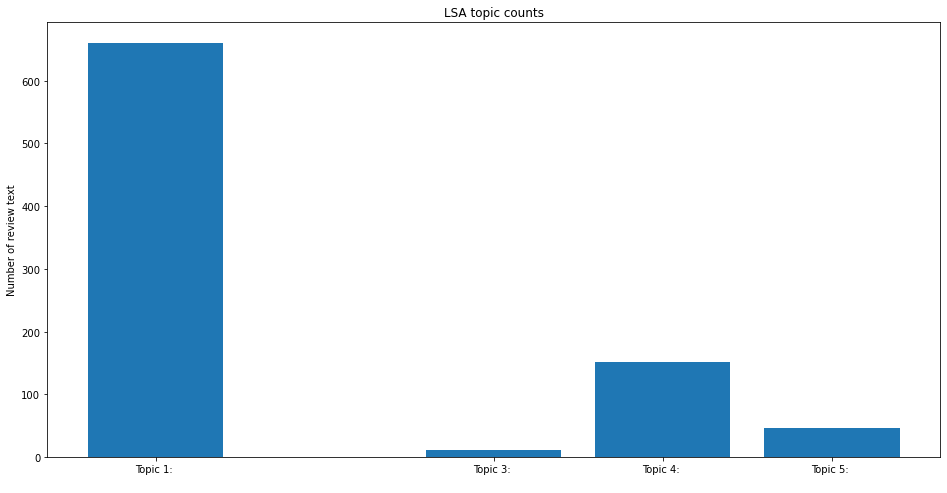

In [30]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i+1) for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 869 samples in 0.011s...
[t-SNE] Computed neighbors for 869 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 869 / 869
[t-SNE] Mean sigma: 0.060640
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.781948
[t-SNE] KL divergence after 2000 iterations: 0.277104


ValueError: need at least one array to concatenate